# HOMEWORK 1 - SOCCER ANALYTICS

## Libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as se
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from collections import OrderedDict
import functions as f
import helper as hlp
import importlib
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from random import sample
import codecs
import warnings
warnings.filterwarnings('ignore')

In [199]:
importlib.reload(hlp)

<module 'helper' from '/Users/antonio/workspace/university/amdm/homework/hw2/helper.py'>

## Before starting

All the data come from [this website](https://figshare.com/collections/Soccer_match_event_dataset/4415000) : the data are collected by [WyScout](https://wyscout.com), a professional football platform for Player Agents, Scouts, Players, Journalists and Referee.
We use different types of file (teams, players, events, matches, coaches), so we will upload the files depending on what we need.

We downloaded different files, so we load the appropriate files each time based on the research.
The file are download from the website and stored in the "data" folder, that contains:
    - matches: folder with matches files for each competition
    - events: folder with events files for each competition
    - teams.json: file with all the teams
    - coaches.json: file with all the coaches
    - players.json: file with all the players

## [RQ1] - _Who wants to be a Champion?_

    We load the json file and create the dataframe 

In [30]:
path = "data/matches/matches_England.json"
df_matches = f.load_PremierLeague_games(path)

    We calculate the points for each week for each team and do a plot about it

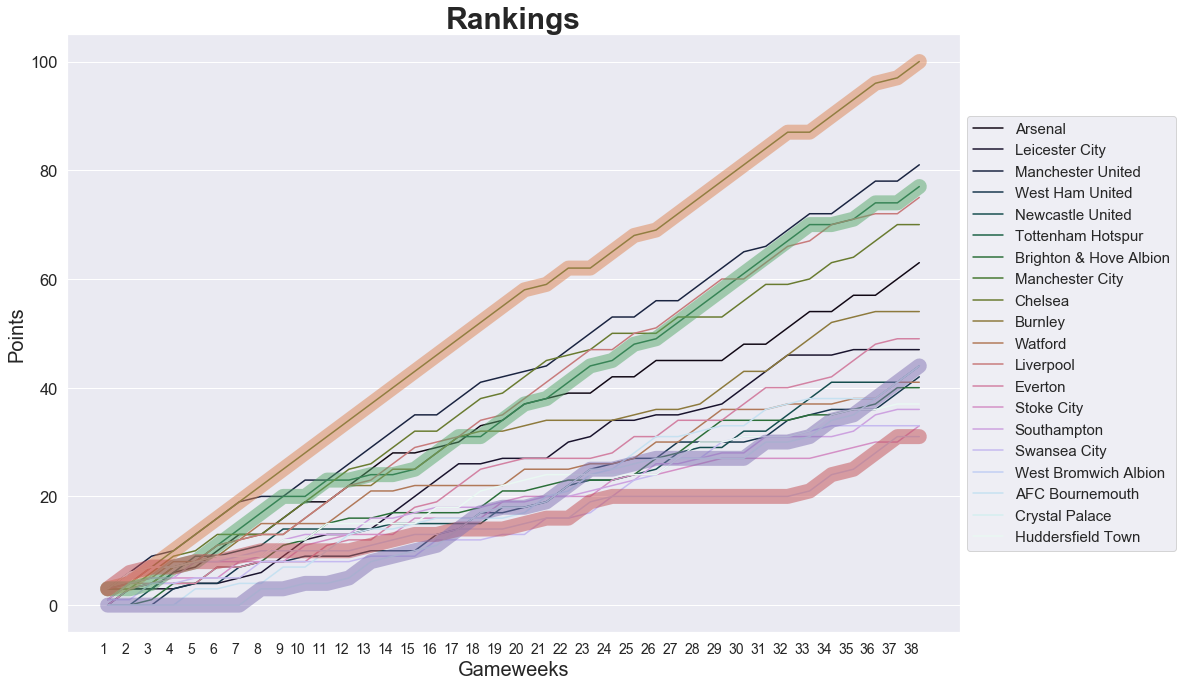

In [36]:
f.get_points_by_week(df_matches)

    We highlighted the two teams that got the longest winning streak (# of consecutive wins), and the two teams that got the longest losing streak (# of consecutive losses):
    
    The longest winning streaks are:
    - Manchester City with 18 wins
    - Tottenham Hotspur with 7 wins

    The longest losing streaks are:
    - West Bromwich Albion with 8 losses
    - Crystal Palace with 6 losses

## [RQ2] - _Is there a home-field advantage?_

Our aim, in this step, is to verify the subsistance of an actual correlation between the victories gained by a team and the side on which the match is played. 
We will draw our conclusions from the results obtained by the run of a Chi-Squared test based on the following hypotheses system:

$H_0 =$ **{_"There is no causal nexus between the win of the team and the fact it plays home"_}**
<br>
$H_1 =$ **{_"There is a causal nexus between the win of the team and the fact it plays home"_}**

    we select 5 teams from the Premier League

In [40]:
teams = ['Southampton', 'Liverpool', 'Chelsea', 'Manchester United', 'Everton']

In [198]:
teams

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695
5,"{'name': 'France', 'id': '250', 'alpha3code': ...",Troyes,Troyes,Esp\u00e9rance Sportive Troyes Aube Champagne,club,3795
6,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Getafe (Madrid),Getafe,Getafe Club de F\u00fatbol,club,698
7,"{'name': 'Germany', 'id': '276', 'alpha3code':...",M\u00f6nchengladbach,Borussia M'gladbach,Borussia VfL M\u00f6nchengladbach,club,2454
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
9,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Bilbao,Athletic Club,Athletic Club Bilbao,club,678


In [202]:
cont_table = f.contingency_table(df_matches, teams)
cont_table

KeyError: 0

In [ ]:
stat, p, dof, expected = chi2_contingency(cont_table)

In [ ]:
print(p)

    Since the p-value is less than 0.01, we are allowed to reject the null hypothesis and come to the conclusion that it exists a connection between the wins brought back by a team and the fact it plays the match at home.

## [RQ3] - _Which teams have the youngest coaches?_

    We load the data of teams and coach, then we merge them

In [92]:
coaches = pd.read_json('data/coaches.json')
teams = pd.read_json('data/teams.json', orient = 'record')
coach_teams_orig = pd.merge(coaches, teams, left_on="currentTeamId", right_on="wyId")

    Cleaning data: we need only fews columns 

In [93]:
coach_teams = pd.DataFrame(coach_teams_orig, columns=["area", "birthDate", "firstName", "lastName", "shortName", "currentTeamId", "name", "officialName"])

    and we need only Premier League's coaches, ordered by age and without duplicate for the same team 
    (in case of duplicate we will keep the youngest coach):

In [95]:
coach_teams_en = hlp.coachHelper(coach_teams, "England")

    now we can analyze the age's distribution of the coaches with a box plot:

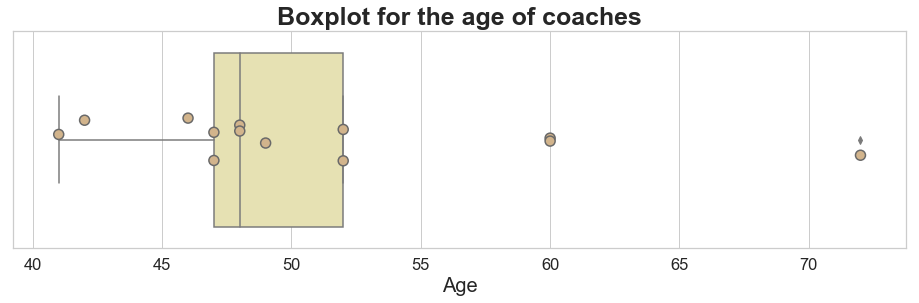

In [100]:
hlp.boxplotCoaches(coach_teams_en)

In [102]:
hlp.printYoungestCoaches(coach_teams_en)

The 10 youngest coaches

Eddie Howe 
age: 41 	 team: AFC Bournemouth 

Marco Alexandre Saraiva da Silva 
age: 42 	 team: Everton 

Francisco de Míguel Moreno 
age: 46 	 team: Newcastle United 

Unai Emery Etxegoien 
age: 47 	 team: Arsenal 

Mauricio Roberto Pochettino Trossero 
age: 47 	 team: Tottenham Hotspur 

Sean Dyche 
age: 48 	 team: Burnley 

Josep  Guardiola i Sala 
age: 48 	 team: Manchester City 

Javier Gracia Carlos 
age: 49 	 team: Watford 

Ralph Hasenhüttl 
age: 52 	 team: Southampton 

Jürgen Klopp 
age: 52 	 team: Liverpool 



## [RQ4] - _Completed passes and attempted passes_

    We load the data of Premier League's events and players

In [105]:
events_premier = "data/events/events_England.json"
players = "data/players.json"
df_passes = f.load_passes(events_premier, players)

    We only take into account the players who have made more passes than the average, and we can conclude that:
   

In [106]:
f.top10_accuratePlayers(df_passes)

J. Stones      0.9759136212624585
F. Delph       0.9450757575757576
V. Kompany     0.9432063263838965
A. Christensen 0.9402173913043478
P. Jones       0.9385052034058656
N. Otamendi    0.9375843454790823
Mohamed Elneny 0.9364508393285371
İ. Gündoğan    0.9355555555555556
V. Lindelöf    0.9355281207133059
M. Dembélé     0.9326007326007326


    We can see that the 70% of them are defenders. We can explain this simply because the defenders play in an area of the field where it is easier to pass the ball.
    Another curious fact is that 50% of them are from the Mancheseter City: the team that won the championship,
    making 100 points and the longest streak of wins (their quality is also confirmed by this info!).

## [RQ5] - _Does being a tall player mean winning more air duels?_ 

    We load the data of Premier League's events, players and team

In [138]:
players = pd.read_json('data/players.json')
events = pd.read_json('data/events/events_England.json')
teams = pd.read_json('data/teams.json')

    Cleaning data: we need only the air duels merged with the players

In [139]:
event = "Air duel"

In [140]:
air_duels = hlp.airDuelsHelper(events, players, event)

    Now we need air duels won by player and air duels attempted by players

In [141]:
air_duels_won_by_player = air_duels.groupby(["playerId", "shortName", "height", "firstName", "lastName"]).sum()
air_duels_by_player = air_duels.groupby(["playerId", "shortName", "height", "firstName", "lastName"]).count()
air_duels_by_player.rename(columns={"won_duel" : "tot_duel"}, inplace=True)

    Now we can merge them and create a single dataframe. We only take into account the players who have attempted more air duels than the average.

In [153]:
air_duels_by_player_mg_redux = hlp.mergedAirDuelsPlayers(air_duels_won_by_player, air_duels_by_player)

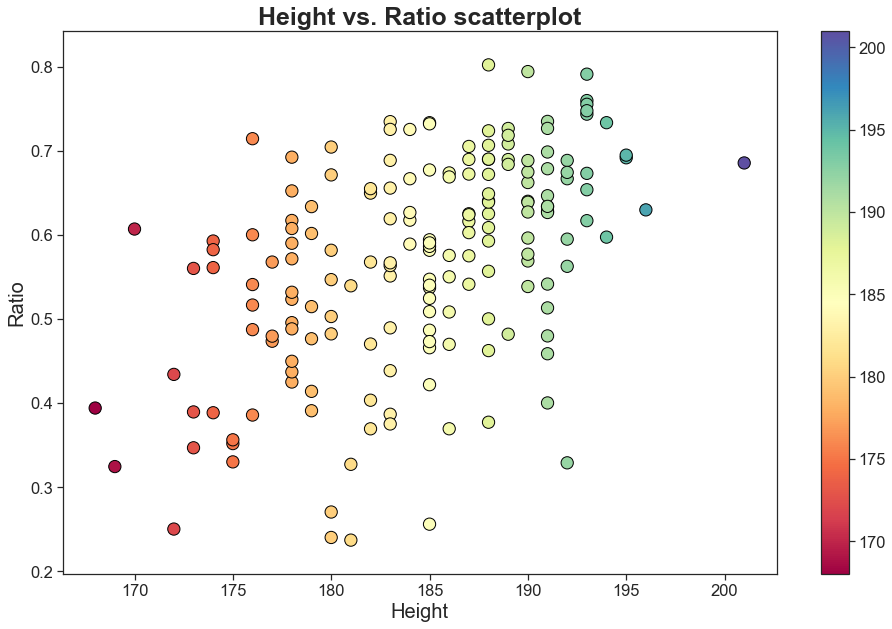

In [154]:
hlp.airDuelsScatterPlot(air_duels_by_player_mg_redux)

    We can conclude that there is a correlation between the height and the won air duels. Increasing the height, the ratio of won air duels grows. 

## [RQ6] - _Free your mind!_

    We would inspect some aspects of the fouls committed:
    - avg of fouls per game for each league
    - more aggressive players (players with many committed fouls)
    
    We need the files of events of the 5 competitions.

In [183]:
events_ita = pd.read_json('data/events/events_Italy.json')
events_spa = pd.read_json('data/events/events_Spain.json')
events_eng = pd.read_json('data/events/events_England.json')
events_fra = pd.read_json('data/events/events_France.json')
events_ger = pd.read_json('data/events/events_Germany.json')

    Now we can clean the data and get only the fouls event group by matchId. And then calculate the average.

In [187]:
fouls_per_match = hlp.getFoulsPerMatch(events_ita, events_spa, events_eng, events_fra, events_ger)

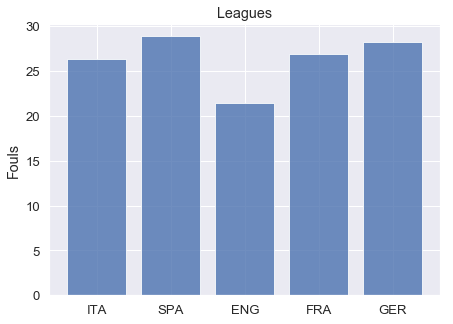

In [200]:
hlp.plotFouls(fouls_per_match)

     This plot confirms the commonplace of English arbitrage: in fact we note from the average of fouls per game that in Premier League less faults are assigned.


## [CR1] - _What are the time slots of the match with more goals?_

    we load all the events' files and we assign to all the goals in the dataframe a timeslot

In [ ]:
events = ['data/events/events_England.json', 'data/events/events_France.json', 'data/events/events_Germany.json', 
           'data/events/events_Italy.json', 'data/events/events_Spain.json']
df_goals = f.make_goals_DataFrame(events)

    now we can do a plot to represent the goals grouped by timeslot

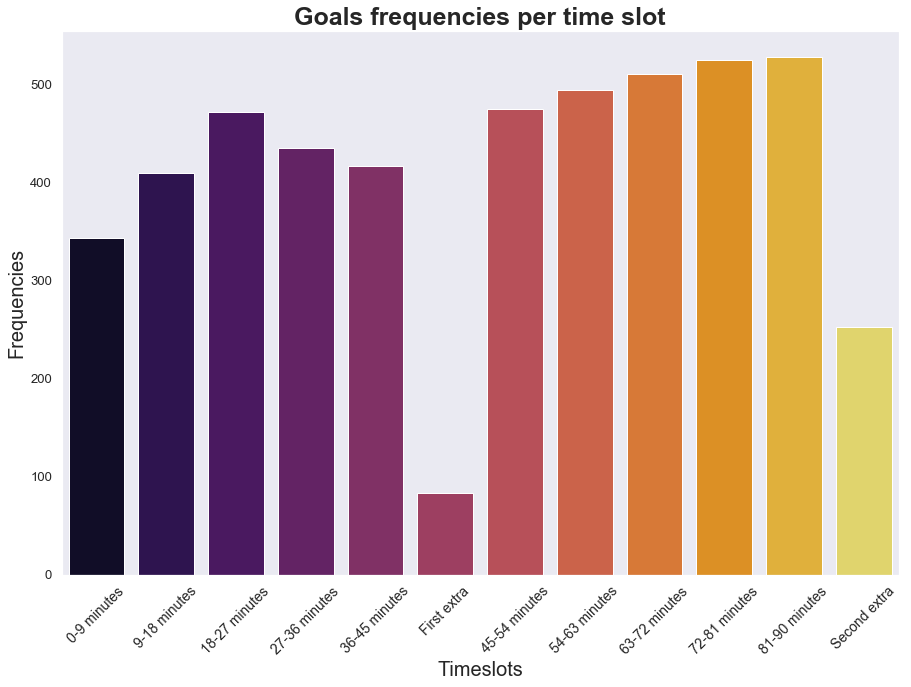

In [156]:
f.teams_goal_barPlot(df_goals)

    It's clear that there are more goals on the second half. Maybe in the first half the teams are generally more careful. In the second half if the teams want to win the game, they are forced to risk a little more

    Now we want to find the top 10 teams that score the most in the interval "81-90":

In [160]:
teams_file = 'data/teams.json'
df_slot10 = f.get_teams10(df_goals, teams_file)
df_slot10

,teamId,goals,officialName
0,676,19,FC Barcelona
1,675,14,Real Madrid Club de F\u00fatbol
2,3767,14,Paris Saint-Germain FC
3,1625,13,Manchester City FC
4,3162,12,SS Lazio
5,3774,12,Stade Rennais FC
6,1609,11,Arsenal FC
7,2444,10,FC Bayern M\u00fcnchen
8,1610,10,Chelsea FC
9,687,10,Real Sociedad de F\u00fatbol


    and if there are players that were able to score at least one goal in 8 different intervals: 

In [186]:
f.get_numPlayer_8slots(df_goals)

37 Players scored in 8th slot


## [CR2] - _Visualize movements and passes on the pitch!_

#### Part 1

    For anylize the events of Messi and Ronaldo in the match between Real Madrid and Barcelona, we need the players file and events and matches of Spanish Liga.

In [162]:
players = pd.read_json('data/players.json')
spain_matches = pd.read_json('data/matches/matches_Spain.json')
spain_events = pd.read_json('data/events/events_Spain.json')

    Now we can clean the data and estrapolate from the datasets the coordinates of the position of each events of the two players.

In [164]:
coordinates_x_y = hlp.getPlayersCordinatesFromEvents('Messi', 'Ronaldo', players, spain_matches, spain_events)

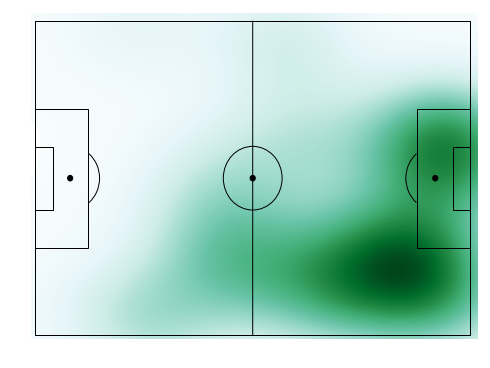

In [168]:
hlp.heatMap(coordinates_x_y["ronaldo"], "BuGn")

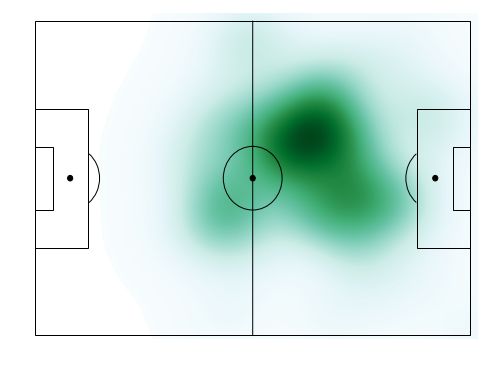

In [169]:
hlp.heatMap(coordinates_x_y["messi"], "BuGn")

    We see in this two heatmap the principal differences of the two players: 
        - Ronaldo is used to play as wing forward and then going to fill the area to score
        - Messi is used to lowering himself on the midfield line to get the ball and pass it to his teammates, and then reach the goal coming from outside the area.
    Although theoretically they play the same role, they do completely different things and these heat maps are the proof.

#### Part 2

For anylize the events of Jorginho and Pjanic in the match between Juventus and Napoli, we need the players file and events and matches of Italian Seria A    

In [171]:
italy_matches = pd.read_json('data/matches/matches_Italy.json')
italy_events = pd.read_json('data/events/events_Italy.json')

    Now we need to clean data and extrapolate the passes of Pjanic (we will use the name Miralem to find him in the dataset) and Jorginho in the match of 2018-04-22.

In [174]:
players_events = hlp.getPlayersPassesFromEvents('Miralem', 'Jorginho', italy_events, italy_matches, players)

In [177]:
all_passes = players_events["pjanic"].append(players_events["jorginho"])

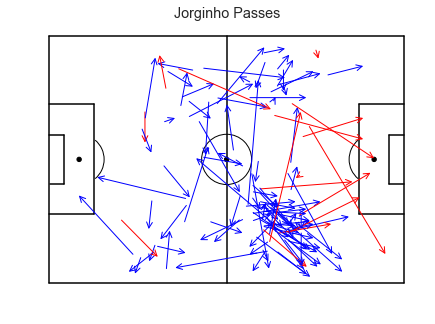

In [179]:
hlp.plotPassesMap(players_events["jorginho"], "Jorginho Passes")

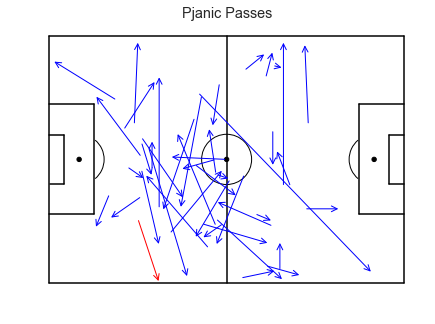

In [180]:
hlp.plotPassesMap(players_events["pjanic"], "Pjanic Passes")

         Jorginho made 114 passes, 60 more than Pjanic. 
    Pjanic and Jorginho play in the same position of the field, so observing the passages we could hypothesize that Napoli held the higher barycentre. 
    Given the difference of the number of passes, it is possible to assume a superior ball possession of Napoli. One of the characteristics of Napoli's game is the ball possession in the narrow (that means with many passages nearby ), and this is confirmed by the length of Jorginho's passages.
    Pjanic missed only one pass of 44, but he never tried to verticalise, when Jorginho missed many more passes, but he tried some vertical passes forward.

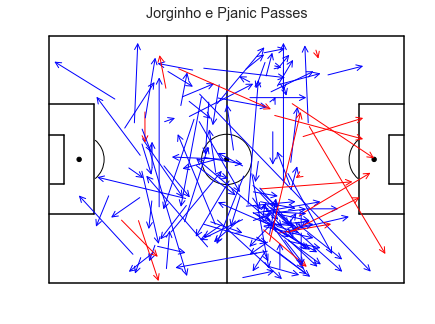

In [182]:
hlp.plotPassesMap(all_passes, "Jorginho e Pjanic Passes")

    In general it's clear how the passages made by the two players are only in the lower or central part of the field, and never near the opponent's goal.
